Q1 Fashion MNIST plot

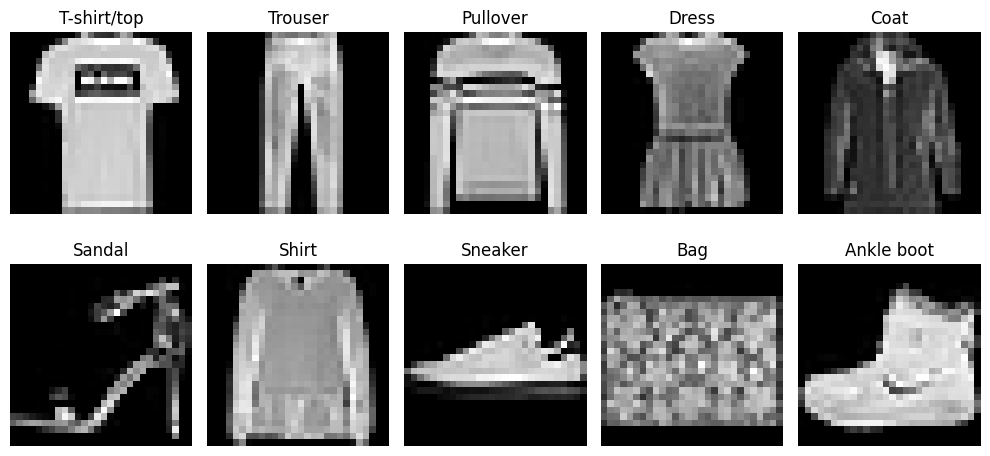

(60000, 28, 28)
(60000,)


In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist,mnist
import numpy as np
# Load the Fashion-MNIST dataset
(images_to_train, labels_to_train), (test_images,test_labels) = fashion_mnist.load_data()
images_to_train=images_to_train/255.0
test_images=test_images/255.0
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Function to plot one sample image for each class
def plot_samples(images, labels, class_names):
    plt.figure(figsize=(10, 5))
    # for i in range(len(class_names)):
    i=0
    while i<len(class_names):
        # Find the index of the first image with the current class label
        idx = np.where(labels == i)[0][0]
        image = images[idx]
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(class_names[i])
        plt.axis('off')
        i+=1
    plt.tight_layout()
    plt.show()
# Plot one sample image for each class
plot_samples(images_to_train, labels_to_train, class_names)
print(images_to_train.shape)
print(labels_to_train.shape)

Q2 feedforward neural network, forward propagation

In [ ]:
import numpy as np
def initialize_w_and_b(no_of_layers,weight_func):
  total_neurons_per_layer=[]
  for i in range(no_of_layers):
    total_neurons_per_layer.append(int(input()))
  # print(total_neurons_per_layer)
  W_s=[]
  B_s=[]
  W_s.append(np.random.rand(total_neurons_per_layer[0],784))
  B_s.append(np.random.rand(total_neurons_per_layer[0],1))
  for i in range(1,no_of_layers):
    W_s.append(np.random.rand(total_neurons_per_layer[i],total_neurons_per_layer[i-1]))
    B_s.append(np.random.rand(total_neurons_per_layer[i],1))
  W_s.append(np.random.rand(10,total_neurons_per_layer[no_of_layers-1]))
  B_s.append(np.random.rand(10,1))
  return W_s,B_s
no_of_layers=int(input("Enter the number of layers:"))
# weights_list=[]
# biases_list=[]
w_s,b_s = initialize_w_and_b(no_of_layers,"Xavier")
# print(w_s)
# print(b_s)

Enter the number of layers:3
64
64
64


In [ ]:
flattened_image=images_to_train[0].flatten().reshape((784,1))
def sigmoid_function(a_s):
  return 1/(1+np.exp(-a_s))
def soft_max_function(a_s):
  # sum_of_a=np.sum(np.exp(a_s))
  sum_of_a=0
  for i in range(len(a_s)):
    sum_of_a+=np.exp(a_s[i])
  # print(h_s.shape)
  # print(a_s.shape)
  for i in range(10):
    a_s[i]=np.exp(a_s[i])/(sum_of_a)
  return a_s
def forward_propagation(w_s,b_s,flattened_image,no_of_layers,images_to_train):
  a_s=[]
  h_s=[]
  h_s.append(flattened_image)
  for i in range(no_of_layers):
    # print(w_s[i].shape,flattened_image.shape)
    a_s.append(np.matmul(w_s[i],flattened_image)+b_s[i])
    h_s.append(sigmoid_function(a_s[i]))
    flattened_image=h_s[-1]
  a_s.append(np.matmul(w_s[-1],flattened_image)+b_s[-1])
  # print(a_s[-1].shape)
  # print(h_s[-1].shape)
  # print(b_s[-1].shape)
  # print(a_s[-1])
  h_s.append(soft_max_function(a_s[-1]))
  # print(a_s[-1])
  # print(h_s[-1].shape)
  return a_s,h_s
a_s,h_s=forward_propagation(w_s,b_s,flattened_image,no_of_layers,images_to_train)
# print(a_s[-1])
# print(np.sum(h_s[-1]))

In [ ]:
print(w_s[-1].shape)
print(h_s[-1].shape)

(10, 64)
(10, 1)


Q3: Backward_propagation Algorithms

In [ ]:
# import numpy as np
# X = [0.5,2.5]
# Y = [0.2,0.9]

# def f(x,w,b):
#   return 1/(1+np.exp(-(w*x+b)))

# def error(w,b):
#   err = 0.0
#   for x,y in zip(X,Y):
#     fx = f(x,w,b)
#     err += (fx-y)**2
#   return 0.5*err

# def grad_b(x,w,b,y):
#   fx = f(x,w,b)
#   return (fx-y)*fx*(1-fx)

# def grad_w(x,w,b,y):
#   fx = f(x,w,b)
#   return (fx-y)*fx*(1-fx)*x

# def do_gradient_descent():

#   w,b,eta,max_epochs = -2,-2,1.0,1000

#   for i in range(max_epochs):
#     dw,db = 0,0
#     for x,y in zip(X,Y):
#       dw += grad_w(x,w,b,y)
#       db += grad_b(x,w,b,y)

#     w = w - eta*dw
#     b = b - eta*db
def cross_entropy_loss_function(h_s):
  return -np.log(h_s[np.argmax(h_s)])
def sigmoid_derivative(a_s):
  fx=sigmoid_function(a_s)
  return fx*(1-fx)
def backward_propagation(a_s,h_s,label_image,w_s,b_s,no_of_layers):
  theta_w=[]
  theta_b=[]
  #compute with output param
  nabla_a_last=-(label_image-h_s[-1])
  for k in range(no_of_layers,-1,-1):
    #grd wrt parameters
    # print(h_s[k].shape)
    # print(nabla_a_last.shape)
    nabla_w_last=np.matmul(nabla_a_last,h_s[k].T)
    theta_w.append(nabla_w_last)
    nabla_b_last=nabla_a_last
    theta_b.append(nabla_b_last)
    if(k==0):
      break
    #grd wrt layers
    nabla_h_last=np.matmul(w_s[k].T,nabla_a_last)
    #wrt pre_activation
    nabla_a_last=np.multiply(nabla_h_last,sigmoid_derivative(a_s[k-1]))
  return theta_w,theta_b
label_image=np.zeros((10,1))
label_image[labels_to_train[0]]=1
backward_propagation(a_s,h_s,label_image,w_s,b_s,no_of_layers)
loss=cross_entropy_loss_function(h_s[-1])
# print(h_s[-1][loss])
# print(loss)
# print("  ")
# print(h_s[-1])

Algorithms Stochastic Gradient Descent

In [ ]:
def find_loss(h_s,label_image):
  return -np.log(h_s[np.argmax(h_s)][0])
def cal_val_acc_and_loss(h_s,images_to_train,validation_split):
  total=int(60000*(validation_split))
  validation_loss=0
  validation_acc=0
  for i in range(59998-total,60000):
    label_image=np.zeros((10,1))
    label_image[labels_to_train[i]]=1
    # print(images_to_train[i].shape)
    a_s,h_s=forward_propagation(w_s,b_s,np.float128(images_to_train[i].flatten().reshape((784,1))),no_of_layers,images_to_train)
    validation_loss+=find_loss(h_s[-1],label_image)
    if(np.argmax(h_s[-1])==np.argmax(label_image)):validation_acc+=1
  return validation_acc,validation_loss
eta=1e-1
max_epoch=10
validation_split=0.1
def stochastic_gradient_descent(w_s,b_s,labels_to_train,validation_split,eta):
  for iterations in range(max_epoch):
    total_accuracy=0
    total_loss=0
    dw=[np.zeros_like(every_ele) for every_ele in w_s]
    db=[np.zeros_like(every_ele) for every_ele in b_s]
    for i in range(int(60000*1-(60000*validation_split))):
      label_image=np.zeros((10,1))
      label_image[labels_to_train[i]]=1
      a_s,h_s=forward_propagation(w_s,b_s,np.float128(images_to_train[i].flatten().reshape((784,1))),no_of_layers,images_to_train)
      total_loss+=find_loss(h_s[-1],label_image)
      if(np.argmax(h_s[-1])==labels_to_train[i]):
        total_accuracy+=1
      grad_w,grad_b=backward_propagation(a_s,h_s,label_image,w_s,b_s,no_of_layers)
      dw+=grad_w
      db+=grad_b
      # w_s=w_s-eta*grad_w
      # w_s=w_s-(np.dot(eta,x) for x in grad_w)
      # b_s=b_s-(np.dot(eta,x) for x in grad_b)
      grad_w.reverse()
      grad_b.reverse()
      # print(grad_w[-1].shape)
      # print(grad_b[-1].shape)
      # print(grad_w[0].shape)
      # print(grad_b[0].shape)
      # print(total_loss)
      w_s = [w - np.dot(eta, x) for w, x in zip(w_s, dw)]
      b_s = [b - np.dot(eta, x) for b, x in zip(b_s, db)]
    # b_s=b_s-eta*grad_b
    # w_b=w_b-np.dot(eta,grad_b)
    validation_accuracy,validation_loss=cal_val_acc_and_loss(h_s,images_to_train,validation_split)
    loss=(total_loss/(60000*(1-validation_split)))
    accuracy=(total_accuracy/(60000*(1-validation_split)))
    valid_loss=(validation_loss/(60000*(1-validation_split)))
    valid_accuracy=(validation_accuracy/(60000*(1-validation_split)))
    print(f"training loss: {loss},training accuracy: {accuracy}, validation accuracy: {valid_accuracy}, validation loss: {valid_loss}")
stochastic_gradient_descent(w_s,b_s,labels_to_train,validation_split,eta)

NameError: name 'w_s' is not defined

Algorithm Momentum Gradient Descent (mini_batch)



In [ ]:
beta=0.5
mini_batch_size=float(input())
def momentum_based_gradient_descent(w_s,b_s,labels_to_train,validation_split,eta,beta,mini_batch_size):
  last_uw=[np.zeros_like(every_ele) for every_ele in w_s]
  last_ub=[np.zeros_like(every_ele) for every_ele in b_s]
  for iterations in range(max_epoch):
    total_accuracy=0
    total_loss=0
    dw=[np.zeros_like(every_ele) for every_ele in w_s]
    db=[np.zeros_like(every_ele) for every_ele in b_s]
    points_touched_till_now=0
    for i in range(int(60000*1-(60000*validation_split))):
      label_image=np.zeros((10,1))
      label_image[labels_to_train[i]]=1
      a_s,h_s=forward_propagation(w_s,b_s,np.float128(images_to_train[i].flatten().reshape((784,1))),no_of_layers,images_to_train)
      total_loss+=find_loss(h_s[-1],label_image)
      if(np.argmax(h_s[-1])==labels_to_train[i]):
        total_accuracy+=1
      grad_w,grad_b=backward_propagation(a_s,h_s,label_image,w_s,b_s,no_of_layers)
      grad_w+=grad_w
      grad_b+=grad_b
      points_touched_till_now+=1
      # w_s=w_s-eta*grad_w
      # w_s=w_s-(np.dot(eta,x) for x in grad_w)
      # b_s=b_s-(np.dot(eta,x) for x in grad_b)
      if(points_touched_till_now%mini_batch_size==0):
        grad_w.reverse()
        grad_b.reverse()
        # print(grad_w[-1].shape)
        # print(grad_b[-1].shape)
        # print(grad_w[0].shape)
        # print(grad_b[0].shape)
        # print(total_loss)
        u_w=[np.dot(beta,last_uw[x]) for x in range(len(last_uw))]+grad_w
        u_b=[np.dot(beta,last_ub[x]) for x in range(len(last_ub))]+grad_b
        # u_w=beta*last_uw+grad_w
        # u_b=beta*last_ub+grad_b
        w_s = [w - np.dot(eta, x) for w, x in zip(w_s, u_w)]
        b_s = [b - np.dot(eta, x) for b, x in zip(b_s, u_b)]
        last_uw=u_w
        last_ub=u_b
    # b_s=b_s-eta*grad_b
    # w_b=w_b-np.dot(eta,grad_b)
    validation_accuracy,validation_loss=cal_val_acc_and_loss(h_s,images_to_train,validation_split)
    loss=(total_loss/(60000*(1-validation_split)))
    accuracy=(total_accuracy/(60000*(1-validation_split)))
    valid_loss=(validation_loss/(60000*(1-validation_split)))
    valid_accuracy=(validation_accuracy/(60000*(1-validation_split)))
    print(f"training loss: {loss},training accuracy: {accuracy}, validation accuracy: {valid_accuracy}, validation loss: {valid_loss}")
momentum_based_gradient_descent(w_s,b_s,labels_to_train,validation_split,eta,beta,mini_batch_size)

0.5


NameError: name 'w_s' is not defined

Algorithm Nestrov Gradient Descent

In [ ]:
beta=0.5
mini_batch_size=float(input())
def nestrov_gradient_descent(w_s,b_s,labels_to_train,validation_split,eta,beta,mini_batch_size):
  last_uw=[np.zeros_like(every_ele) for every_ele in w_s]
  last_ub=[np.zeros_like(every_ele) for every_ele in b_s]
  for iterations in range(max_epoch):
    total_accuracy=0
    total_loss=0
    dw=[np.zeros_like(every_ele) for every_ele in w_s]
    db=[np.zeros_like(every_ele) for every_ele in b_s]
    points_touched_till_now=0
    u_w=beta*last_uw
    u_b=beta*last_ub
    for i in range(int(60000*1-(60000*validation_split))):
      label_image=np.zeros((10,1))
      label_image[labels_to_train[i]]=1
      a_s,h_s=forward_propagation(w_s,b_s,np.float128(images_to_train[i].flatten().reshape((784,1))),no_of_layers,images_to_train)
      total_loss+=find_loss(h_s[-1],label_image)
      if(np.argmax(h_s[-1])==labels_to_train[i]):
        total_accuracy+=1
      grad_w,grad_b=backward_propagation(a_s,h_s,label_image,w_s-u_w,b_s-u_b,no_of_layers)
      grad_w+=grad_w
      grad_b+=grad_b
      points_touched_till_now+=1
      # w_s=w_s-eta*grad_w
      # w_s=w_s-(np.dot(eta,x) for x in grad_w)
      # b_s=b_s-(np.dot(eta,x) for x in grad_b)
      if(points_touched_till_now%mini_batch_size==0):
        grad_w.reverse()
        grad_b.reverse()
        # print(grad_w[-1].shape)
        # print(grad_b[-1].shape)
        # print(grad_w[0].shape)
        # print(grad_b[0].shape)
        # print(total_loss)
        u_w=[np.dot(beta,last_uw[x]) for x in range(len(last_uw))]+grad_w
        u_b=[np.dot(beta,last_ub[x]) for x in range(len(last_ub))]+grad_b
        w_s = [w - np.dot(eta, x) for w, x in zip(w_s, u_w)]
        b_s = [b - np.dot(eta, x) for b, x in zip(b_s, u_b)]
        last_uw=u_w
        last_ub=u_b
    # b_s=b_s-eta*grad_b
    # w_b=w_b-np.dot(eta,grad_b)
    validation_accuracy,validation_loss=cal_val_acc_and_loss(h_s,images_to_train,validation_split)
    loss=(total_loss/(60000*(1-validation_split)))
    accuracy=(total_accuracy/(60000*(1-validation_split)))
    valid_loss=(validation_loss/(60000*(1-validation_split)))
    valid_accuracy=(validation_accuracy/(60000*(1-validation_split)))
    print(f"training loss: {loss},training accuracy: {accuracy}, validation accuracy: {valid_accuracy}, validation loss: {valid_loss}")
nestrov_gradient_descent(w_s,b_s,labels_to_train,validation_split,eta,beta,mini_batch_size)

Algorithm rmsprop

In [ ]:
eps=1e-4
beta=0.5
mini_batch_size=float(input())
def rmsprop_gradient_descent(w_s,b_s,labels_to_train,validation_split,eta,beta,mini_batch_size):
  last_uw=[np.zeros_like(every_ele) for every_ele in w_s]
  last_ub=[np.zeros_like(every_ele) for every_ele in b_s]
  for iterations in range(max_epoch):
    total_accuracy=0
    total_loss=0
    dw=[np.zeros_like(every_ele) for every_ele in w_s]
    db=[np.zeros_like(every_ele) for every_ele in b_s]
    points_touched_till_now=0
    for i in range(int(60000*1-(60000*validation_split))):
      label_image=np.zeros((10,1))
      label_image[labels_to_train[i]]=1
      a_s,h_s=forward_propagation(w_s,b_s,np.float128(images_to_train[i].flatten().reshape((784,1))),no_of_layers,images_to_train)
      total_loss+=find_loss(h_s[-1],label_image)
      if(np.argmax(h_s[-1])==labels_to_train[i]):
        total_accuracy+=1
      grad_w,grad_b=backward_propagation(a_s,h_s,label_image,w_s,b_s,no_of_layers)
      grad_w+=grad_w
      grad_b+=grad_b
      points_touched_till_now+=1
      # w_s=w_s-eta*grad_w
      # w_s=w_s-(np.dot(eta,x) for x in grad_w)
      # b_s=b_s-(np.dot(eta,x) for x in grad_b)
      if(points_touched_till_now%mini_batch_size==0):
        grad_w.reverse()
        grad_b.reverse()
        # print(grad_w[-1].shape)
        # print(grad_b[-1].shape)
        # print(grad_w[0].shape)
        # print(grad_b[0].shape)
        # print(total_loss)
        u_w=[np.dot(beta,last_uw[x]) for x in range(len(last_uw))]+grad_w
        u_b=[np.dot(beta,last_ub[x]) for x in range(len(last_ub))]+grad_b
        # u_w=beta*last_uw+grad_w
        # u_b=beta*last_ub+grad_b
        w_s = [w - np.dot(eta, x) for w, x in zip(w_s, u_w)]
        b_s = [b - np.dot(eta, x) for b, x in zip(b_s, u_b)]
        last_uw=u_w
        last_ub=u_b
    # b_s=b_s-eta*grad_b
    # w_b=w_b-np.dot(eta,grad_b)
    validation_accuracy,validation_loss=cal_val_acc_and_loss(h_s,images_to_train,validation_split)
    loss=(total_loss/(60000*(1-validation_split)))
    accuracy=(total_accuracy/(60000*(1-validation_split)))
    valid_loss=(validation_loss/(60000*(1-validation_split)))
    valid_accuracy=(validation_accuracy/(60000*(1-validation_split)))
    print(f"training loss: {loss},training accuracy: {accuracy}, validation accuracy: {valid_accuracy}, validation loss: {valid_loss}")
rmsprop_gradient_descent(w_s,b_s,labels_to_train,validation_split,eta,beta,mini_batch_size)